In [ ]:
import pandas as pd
import fasttext
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [0]:
train_data = pd.read_csv('train.tsv',sep="\t")
test_data = pd.read_csv('test.tsv', sep = "\t")

In [0]:
stop_words = set(stopwords.words('english'))
full_train_data = train_data
#segregate the sentences later
for index,row in train_data.iterrows():
    if row['Phrase'] in stop_words:
        train_data.drop(index,inplace=True)

In [0]:
sample_train_data = train_data[train_data['Phrase'].apply(lambda x:len(x.split(" "))<500)]
sample_train_data = sample_train_data[train_data['Phrase'].apply(lambda x:len(x.split(" "))>1)]

In [0]:
text_classifier = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',SGDClassifier(loss='hinge', penalty='l1',
                          alpha=1e-6,
                          max_iter=200, tol=None)),])
text_classifier_bayes = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf',MultinomialNB()),])
text_classifier.fit(sample_train_data['Phrase'],sample_train_data['Sentiment'])
text_classifier_bayes.fit(sample_train_data['Phrase'],sample_train_data['Sentiment'])
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-4, 1e-10),
}

In [0]:
parameters_nb = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
}
#gs_clf = GridSearchCV(text_classifier, parameters, cv=5, n_jobs=-1)
gs_nb_clf = GridSearchCV(text_classifier_bayes, parameters_nb, cv=5, n_jobs=-1)
#gs_clf = gs_clf.fit(sample_train_data['Phrase'],sample_train_data['Sentiment'])
gs_nb_clf = gs_nb_clf.fit(sample_train_data['Phrase'],sample_train_data['Sentiment'])
#print(gs_clf.best_score_)
#for param_name in sorted(parameters.keys()):
    #print("%s: %r" % (param_name, gs_clf.best_params_[param_name]))
predicted = text_classifier.predict(full_train_data['Phrase'])
#new_predicted = gs_clf.predict(full_train_data['Phrase'])
nb_predicted = gs_nb_clf.predict(full_train_data['Phrase'])
for index, element in enumerate(predicted):
    if full_train_data['Phrase'].iloc[index].lower() in stop_words:
        predicted[element] = 2
        #new_predicted[element] = 2
        nb_predicted[element] = 2

In [16]:
print(f" After SVM parameter tuning , accuracy is {np.mean(predicted == full_train_data['Sentiment'])}")
#print(f" Using SVM , the accuracy is {np.mean(new_predicted == full_train_data['Sentiment'])}")
print(f"Using Naive bayes ,after parameter tuning the accuracy is {np.mean(nb_predicted == full_train_data['Sentiment'])}")

print("for SVM , confusion matrix is ")
print(confusion_matrix(list(full_train_data['Sentiment']),list(predicted)))
print("for Naive Bayes, confusion matrix is")
print(confusion_matrix(list(full_train_data['Sentiment']),list(nb_predicted)))

 After SVM parameter tuning , accuracy is 0.7191638077527334
Using Naive bayes ,after parameter tuning the accuracy is 0.6265734714162045
for SVM , confusion matrix is 
[[ 3745  2519   703    97     8]
 [ 1401 15798  9073   935    61]
 [  485  5209 67813  5635   332]
 [   61   742 10317 19985  1820]
 [    4    70   615  3708  4809]]
for Naive Bayes, confusion matrix is
[[  570  2951  3438   110     3]
 [  152  9384 16995   726    11]
 [   62  3186 71405  4736    85]
 [    5   416 16842 15412   250]
 [    1    46  2802  5417   940]]


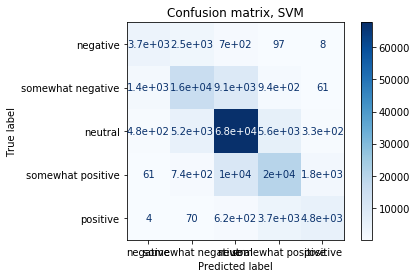

<Figure size 432x288 with 0 Axes>

In [17]:
titles_options = [("Confusion matrix, SVM", None)]
class_names = ['negative','somewhat negative','neutral','somewhat positive','positive']
for title, normalize in titles_options:
    disp = plot_confusion_matrix(text_classifier, full_train_data['Phrase'], full_train_data['Sentiment'],
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)
plt.show()
plt.savefig("confusion_matrix.png")

In [0]:
train_data = pd.read_csv('train.tsv',sep="\t")
test_data = pd.read_csv('test.tsv', sep = "\t")

fastext_data = []

In [21]:
model = fasttext.train_supervised(input='training_data.txt')
print(f"precision is {model.test('training_data.txt')[1]}")
print(f"recall is {model.test('training_data.txt')[2]}")

precision is 0.7034272228207891
recall is 0.7034272228207891
